Dataset caricato correttamente.

Prime 5 righe del dataset:
                              Name             Gender  Rating Value  \
0               9am Afnanfor women          for women          3.73   
1  9am Dive Afnanfor women and men  for women and men          4.29   
2    9am pour Femme Afnanfor women          for women          4.00   
3                 9pm Afnanfor men            for men          4.50   
4    9pm pour Femme Afnanfor women          for women          3.49   

  Rating Count                                       Main Accords Perfumers  \
0          174  ['citrus', 'musky', 'woody', 'aromatic', 'warm...        []   
1          842  ['fruity', 'woody', 'green', 'warm spicy', 'ar...        []   
2           68  ['fruity', 'musky', 'amber', 'citrus', 'powder...        []   
3        6,865  ['vanilla', 'amber', 'warm spicy', 'cinnamon',...        []   
4           63  ['woody', 'aromatic', 'rose', 'fruity', 'powde...        []   

                                      

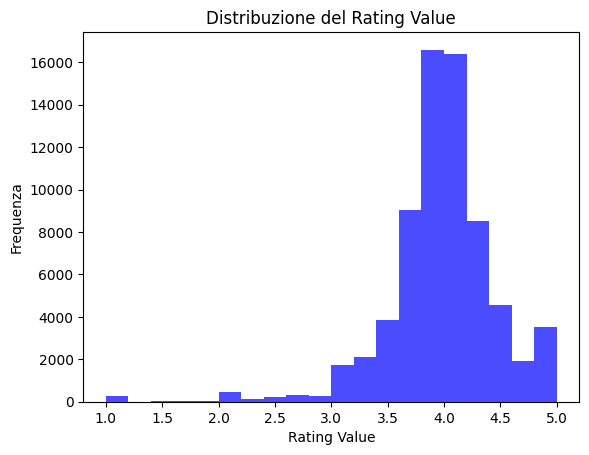

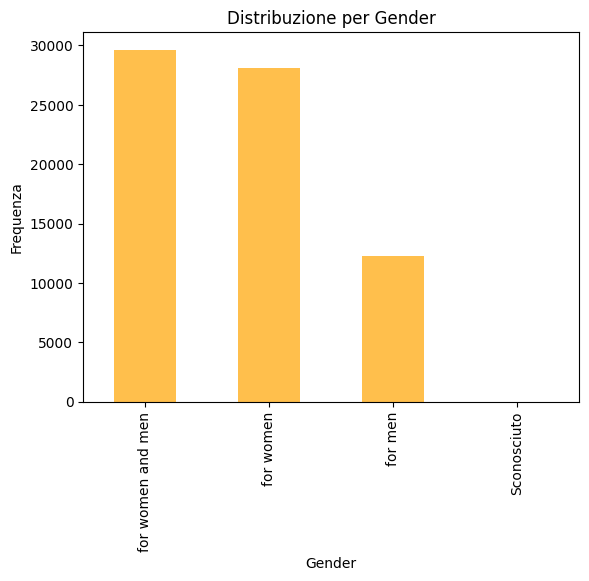


Media del Rating Value per Gender:
Gender
Sconosciuto          3.976368
for men              3.975393
for women            3.951301
for women and men    4.000870
Name: Rating Value, dtype: float64


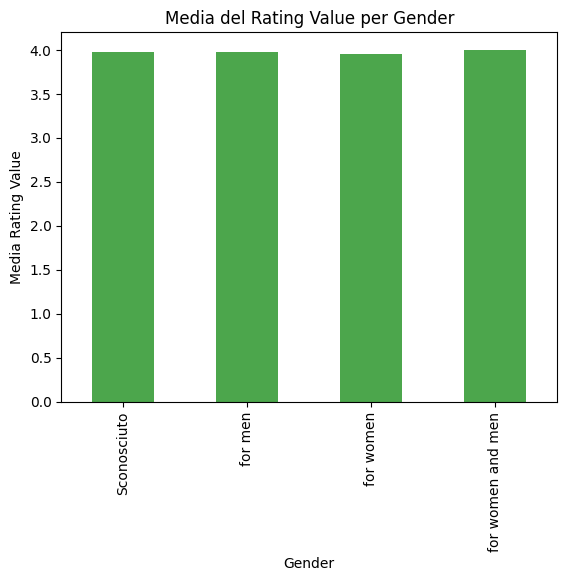


Media del Rating Value per Accordo Principale (Top 10):
        Accord  Mean Rating
8        amber     4.015455
5   warm spicy     4.005217
1      powdery     3.984990
0        woody     3.982237
3        sweet     3.980298
7  fresh spicy     3.977427
4     aromatic     3.975276
6       floral     3.964657
2       citrus     3.962135
9       fruity     3.946977


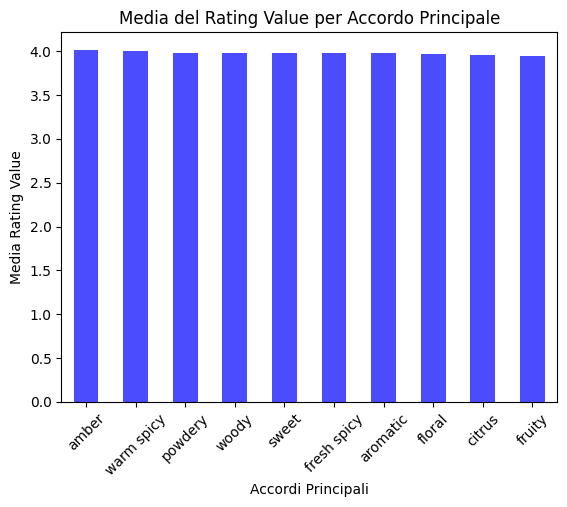


Deviazione standard del Rating Value per Accordo Principale:
woody: 0.49
powdery: 0.49
citrus: 0.50
sweet: 0.48
aromatic: 0.50
warm spicy: 0.50
floral: 0.49
fresh spicy: 0.51
amber: 0.51
fruity: 0.48

I 10 accordi principali più popolari (per frequenza):
woody: 45127
powdery: 35469
citrus: 33667
sweet: 32438
aromatic: 29546
warm spicy: 27196
floral: 27055
fresh spicy: 24724
amber: 24550
fruity: 23739

Confronto tra Popolarità e Media del Rating Value per i Top 10 Accordi:
        Accord  Frequency  Mean Rating
0        woody      45127     3.982237
1      powdery      35469     3.984990
2       citrus      33667     3.962135
3        sweet      32438     3.980298
4     aromatic      29546     3.975276
5   warm spicy      27196     4.005217
6       floral      27055     3.964657
7  fresh spicy      24724     3.977427
8        amber      24550     4.015455
9       fruity      23739     3.946977


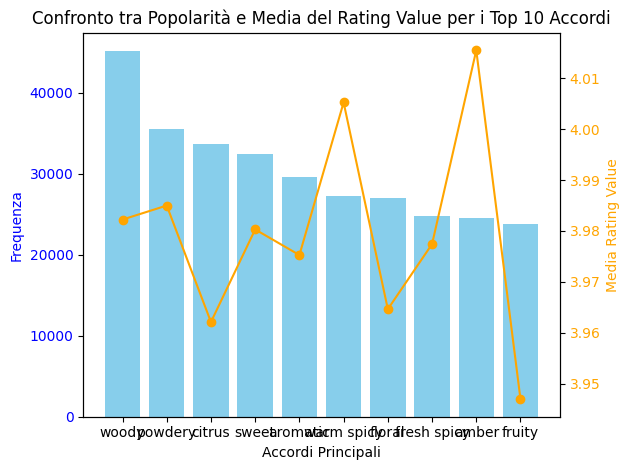


Media del Rating Count per Accordo Principale (Top 10):
woody: 227.70
powdery: 221.91
citrus: 210.15
sweet: 242.10
aromatic: 221.20
warm spicy: 225.86
floral: 214.56
fresh spicy: 207.29
amber: 220.50
fruity: 233.10

Accordi più comuni per Rating Value alto (>4.5):
[('woody', 3999), ('powdery', 3157), ('sweet', 2772), ('citrus', 2765), ('warm spicy', 2698), ('amber', 2612), ('aromatic', 2536), ('floral', 2185), ('musky', 2169), ('fresh spicy', 2162)]

Accordi più comuni per Rating Value basso (<2.5):
[('woody', 634), ('citrus', 515), ('powdery', 446), ('aromatic', 431), ('sweet', 391), ('fresh spicy', 382), ('amber', 374), ('floral', 366), ('warm spicy', 361), ('white floral', 351)]


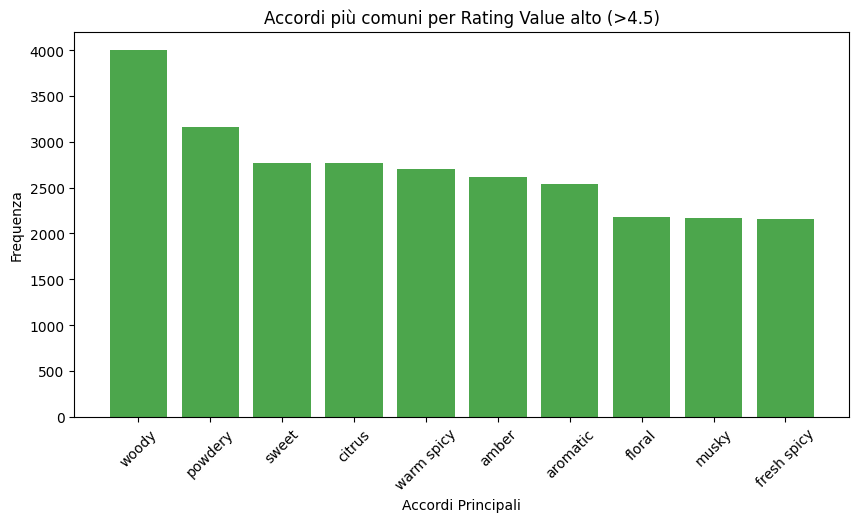

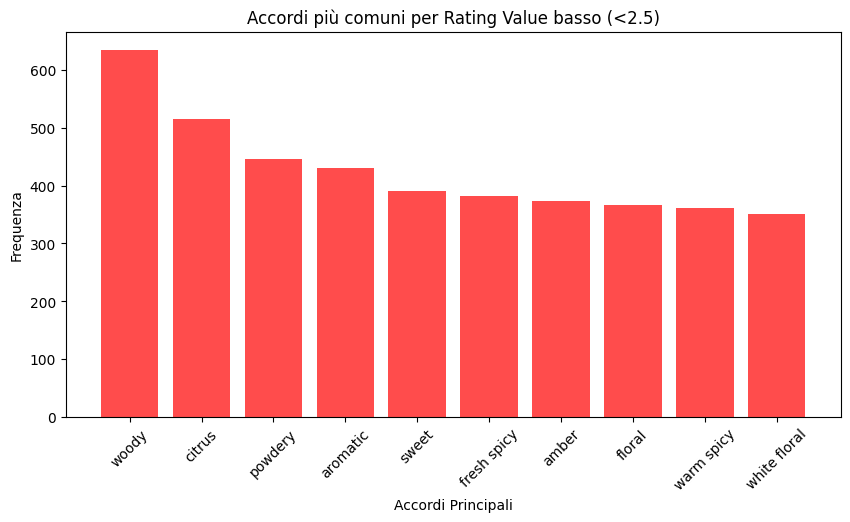


Valori normalizzati di 'Rating Count':
0    0.005828
1    0.028200
2    0.002277
3    0.229922
4    0.002110
Name: Rating Count, dtype: float64

Dataset dopo la trasformazione delle variabili categoriche:
                              Name  Rating Value  Rating Count Perfumers  \
0               9am Afnanfor women          3.73      0.005828        []   
1  9am Dive Afnanfor women and men          4.29      0.028200        []   
2    9am pour Femme Afnanfor women          4.00      0.002277        []   
3                 9pm Afnanfor men          4.50      0.229922        []   
4    9pm pour Femme Afnanfor women          3.49      0.002110        []   

                                         Description  \
0  9ambyAfnanis a fragrance for women. Top notes ...   
1  9am DivebyAfnanis a Aromatic Aquatic fragrance...   
2  9am pour FemmebyAfnanis a Amber fragrance for ...   
3  9pmbyAfnanis a Amber Vanilla fragrance for men...   
4  9pm pour FemmebyAfnanis a Amber Floral fragran...   



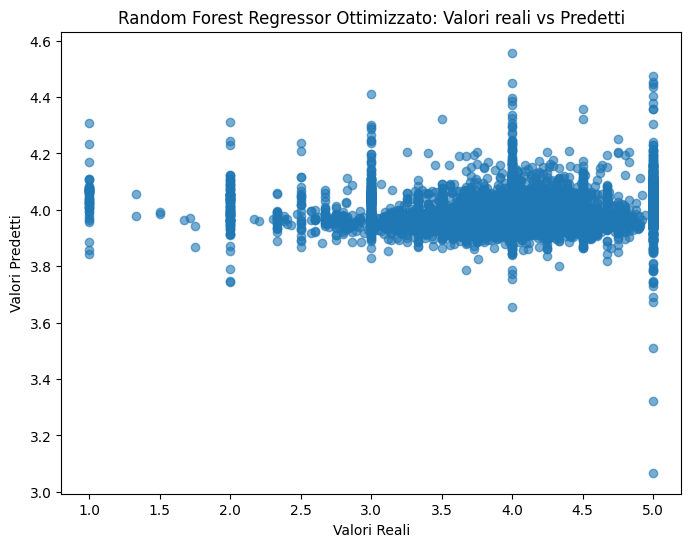


Migliori iperparametri trovati:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}

Valutazione del modello ottimizzato:
Mean Squared Error (MSE): 0.2447
R2 Score: 0.0024


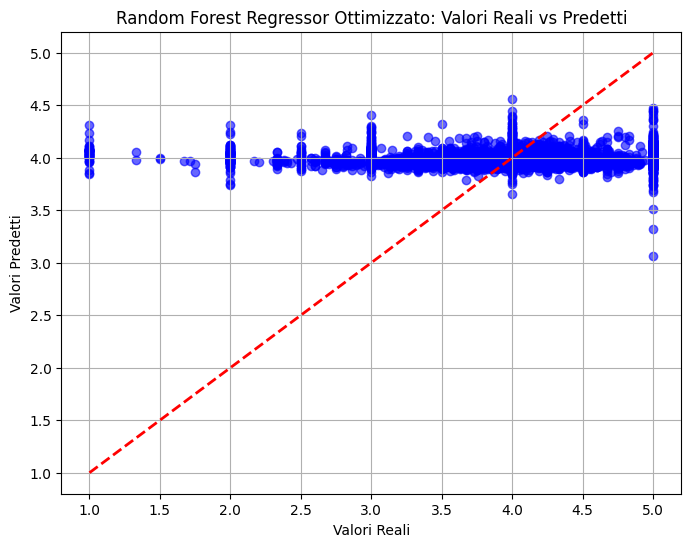


Feature più importanti:
         Feature  Importance
0   Rating Count    0.208949
7          amber    0.032533
26        citrus    0.030944
85    warm spicy    0.028641
37        fruity    0.027861
33        floral    0.027540
11      aromatic    0.027088
55         musky    0.026789
88  white floral    0.026252
90         woody    0.026030


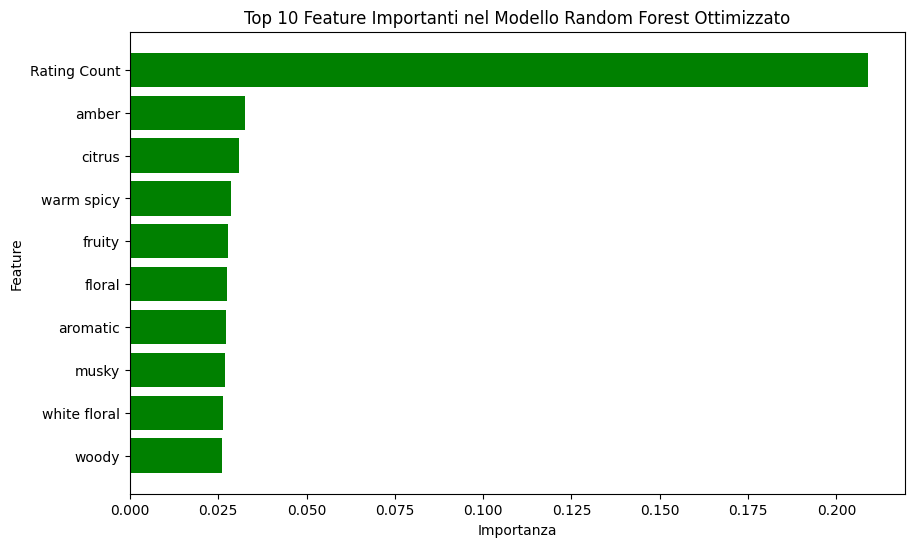


Modello ottimizzato salvato come 'random_forest_ottimizzato.pkl'

Feature più importanti:
         Feature  Importance
0   Rating Count    0.208949
7          amber    0.032533
26        citrus    0.030944
85    warm spicy    0.028641
37        fruity    0.027861
33        floral    0.027540
11      aromatic    0.027088
55         musky    0.026789
88  white floral    0.026252
90         woody    0.026030

Feature Importances salvate come 'feature_importances.csv'

Grafico dei valori reali vs predetti salvato come 'scatter_valori_reali_vs_predetti.png'

Report del modello salvato come 'report_modello.txt'


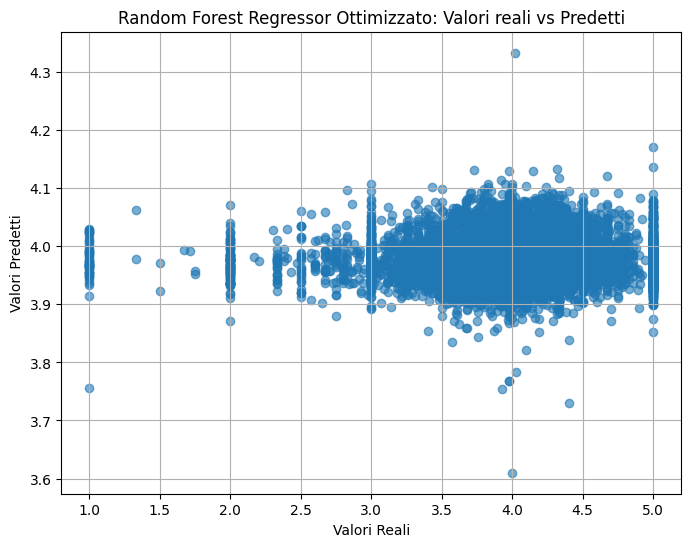

In [34]:
# Importa la libreria pandas
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Carica il dataset
df = pd.read_csv("fra_perfumes.csv")
print("Dataset caricato correttamente.")

# Visualizza le prime 5 righe del dataset
print("\nPrime 5 righe del dataset:")
print(df.head(5))

# Informazioni sul dataset
print("\nInformazioni sul dataset:")
print(df.info())

# Controllo dei valori nulli
print("\nValori nulli per colonna (prima della gestione):")
print(df.isnull().sum())

# Gestione dei valori nulli
# Sostituisci i valori nulli in 'Rating Value' con la media
df['Rating Value'] = df['Rating Value'].fillna(df['Rating Value'].mean())

# Sostituisci i valori nulli in 'Rating Count' con 0
df['Rating Count'] = df['Rating Count'].fillna(0)

# Sostituisci i valori nulli in 'Name', 'Gender', e 'Description'
df['Name'] = df['Name'].fillna('Sconosciuto')
df['Gender'] = df['Gender'].fillna('Sconosciuto')
df['Description'] = df['Description'].fillna('Non disponibile')

# Controlla di nuovo i valori nulli
print("\nValori nulli per colonna (dopo la gestione):")
print(df.isnull().sum())

# Conversione della colonna 'Rating Count' in numeri interi
df['Rating Count'] = df['Rating Count'].replace(',', '', regex=True).astype(int)

# Controllo delle righe duplicate
print("\nNumero di righe duplicate:", df.duplicated().sum())

# Rimuovi le righe duplicate
df.drop_duplicates(inplace=True)
print("\nNumero di righe dopo la rimozione dei duplicati:", len(df))

# Verifica finale del dataset
print("\nInformazioni finali sul dataset:")
print(df.info())

# Statistiche descrittive di Rating Value
print("\nStatistiche descrittive di 'Rating Value':")
print(df['Rating Value'].describe())

# Distribuzione di 'Gender'
print("\nDistribuzione dei valori in 'Gender':")
print(df['Gender'].value_counts())

# Distribuzione di 'Main Accords' (primi 10 accordi più comuni)
from collections import Counter

# Estrai gli accordi principali da tutte le righe
accords = [item.strip() for sublist in df['Main Accords'] for item in sublist.strip("[]").replace("'", "").split(",")]
accords_count = Counter(accords)
print("\nI 10 accordi principali più comuni:")
print(accords_count.most_common(10))

# Istogramma per la distribuzione del Rating Value
import matplotlib.pyplot as plt

plt.hist(df['Rating Value'], bins=20, alpha=0.7, color='blue')
plt.title('Distribuzione del Rating Value')
plt.xlabel('Rating Value')
plt.ylabel('Frequenza')
plt.show()

# Grafico a barre per Gender
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Distribuzione per Gender')
plt.xlabel('Gender')
plt.ylabel('Frequenza')
plt.show()

# Relazione tra 'Gender' e 'Rating Value' (media dei rating per categoria di genere)
gender_rating = df.groupby('Gender')['Rating Value'].mean()
print("\nMedia del Rating Value per Gender:")
print(gender_rating)

# Visualizzazione della relazione tra 'Gender' e 'Rating Value'
gender_rating.plot(kind='bar', color='green', alpha=0.7)
plt.title("Media del Rating Value per Gender")
plt.xlabel("Gender")
plt.ylabel("Media Rating Value")
plt.show()

# Relazione tra 'Main Accords' e 'Rating Value' (10 accordi più comuni)
from collections import Counter

# Estrai e conta gli accordi
accords = [item.strip() for sublist in df['Main Accords'] for item in sublist.strip("[]").replace("'", "").split(",")]
accords_count = Counter(accords)

# Prendi i 10 accordi più comuni
top_accords = [accord[0] for accord in accords_count.most_common(10)]

# Filtra il dataset per i 10 accordi più comuni e calcola la media dei rating
accords_rating = {}
for accord in top_accords:
    accords_rating[accord] = df[df['Main Accords'].str.contains(accord)]['Rating Value'].mean()

# Trasforma in DataFrame per la visualizzazione
import pandas as pd
accords_rating_df = pd.DataFrame(list(accords_rating.items()), columns=['Accord', 'Mean Rating'])
accords_rating_df = accords_rating_df.sort_values(by='Mean Rating', ascending=False)

print("\nMedia del Rating Value per Accordo Principale (Top 10):")
print(accords_rating_df)

# Visualizzazione della relazione tra accordi principali e Rating Value
accords_rating_df.plot(kind='bar', x='Accord', y='Mean Rating', color='blue', alpha=0.7, legend=False)
plt.title("Media del Rating Value per Accordo Principale")
plt.xlabel("Accordi Principali")
plt.ylabel("Media Rating Value")
plt.xticks(rotation=45)
plt.show()

# Calcolo della deviazione standard del Rating Value per ciascun accordo principale
accords_rating_std = {}
for accord in top_accords:
    accords_rating_std[accord] = df[df['Main Accords'].str.contains(accord)]['Rating Value'].std()

# Mostra i risultati
print("\nDeviazione standard del Rating Value per Accordo Principale:")
for accord, std in accords_rating_std.items():
    print(f"{accord}: {std:.2f}")

# Calcola la frequenza totale di ciascun accordo
accords_frequency = Counter(accords)

# Mostra i 10 accordi più comuni
top_accords_frequency = accords_frequency.most_common(10)
print("\nI 10 accordi principali più popolari (per frequenza):")
for accord, freq in top_accords_frequency:
    print(f"{accord}: {freq}")

# Combina media rating e frequenza per i top 10 accordi
accords_popularity_rating = [{"Accord": accord, "Frequency": freq, "Mean Rating": accords_rating[accord]}
    for accord, freq in top_accords_frequency]

# Trasforma in DataFrame per analisi e visualizzazione
accords_popularity_rating_df = pd.DataFrame(accords_popularity_rating)

# Mostra i dati ordinati per frequenza
print("\nConfronto tra Popolarità e Media del Rating Value per i Top 10 Accordi:")
print(accords_popularity_rating_df.sort_values(by="Frequency", ascending=False))

# Grafico combinato
fig, ax1 = plt.subplots()

# Frequenza (bar)
ax1.bar(
    accords_popularity_rating_df["Accord"],
    accords_popularity_rating_df["Frequency"],
    color="skyblue",
    label="Frequency")

ax1.set_xlabel("Accordi Principali")
ax1.set_ylabel("Frequenza", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Media Rating Value (line)
ax2 = ax1.twinx()
ax2.plot(
    accords_popularity_rating_df["Accord"],
    accords_popularity_rating_df["Mean Rating"],
    color="orange",
    marker="o",
    label="Mean Rating")

ax2.set_ylabel("Media Rating Value", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Titolo e legende
plt.title("Confronto tra Popolarità e Media del Rating Value per i Top 10 Accordi")
fig.tight_layout()
plt.show()

# Media del Rating Count per i 10 accordi principali
accords_rating_count = {}
for accord in top_accords:
    accords_rating_count[accord] = df[df['Main Accords'].str.contains(accord)]['Rating Count'].mean()

print("\nMedia del Rating Count per Accordo Principale (Top 10):")
for accord, count in accords_rating_count.items():
    print(f"{accord}: {count:.2f}")

# Filtra i profumi con rating estremi
high_ratings = df[df['Rating Value'] > 4.5]
low_ratings = df[df['Rating Value'] < 2.5]

# Conta gli accordi per rating alto e basso
from collections import Counter

# Accordi per profumi con rating alto
high_accords = Counter([item.strip() for sublist in high_ratings['Main Accords'] for item in sublist.strip("[]").replace("'", "").split(",")])

# Accordi per profumi con rating basso
low_accords = Counter([item.strip() for sublist in low_ratings['Main Accords'] for item in sublist.strip("[]").replace("'", "").split(",")])

# Mostra i risultati
print("\nAccordi più comuni per Rating Value alto (>4.5):")
print(high_accords.most_common(10))

print("\nAccordi più comuni per Rating Value basso (<2.5):")
print(low_accords.most_common(10))

# Converte i risultati in un DataFrame per i grafici
high_accords_df = pd.DataFrame(high_accords.most_common(10), columns=["Accord", "Frequency"])
low_accords_df = pd.DataFrame(low_accords.most_common(10), columns=["Accord", "Frequency"])

# Grafico per Rating Value alto
plt.figure(figsize=(10, 5))
plt.bar(high_accords_df["Accord"], high_accords_df["Frequency"], color="green", alpha=0.7)
plt.title("Accordi più comuni per Rating Value alto (>4.5)")
plt.xlabel("Accordi Principali")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)
plt.show()

# Grafico per Rating Value basso
plt.figure(figsize=(10, 5))
plt.bar(low_accords_df["Accord"], low_accords_df["Frequency"], color="red", alpha=0.7)
plt.title("Accordi più comuni per Rating Value basso (<2.5)")
plt.xlabel("Accordi Principali")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)
plt.show()

# Seleziona le colonne numeriche da normalizzare
columns_to_normalize = ['Rating Count']

# Crea uno scaler per la normalizzazione
scaler = MinMaxScaler()

# Applica la normalizzazione e aggiorna il dataset
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Controlla il risultato della normalizzazione
print("\nValori normalizzati di 'Rating Count':")
print(df['Rating Count'].head())

# Conversione di 'Gender' in variabili numeriche con One-Hot Encoding
gender_encoded = pd.get_dummies(df['Gender'], prefix='Gender')

# Conversione di 'Main Accords' in variabili numeriche con One-Hot Encoding
# Espansione degli accordi principali
accords_expanded = df['Main Accords'].apply(lambda x: [item.strip() for item in x.strip("[]").replace("'", "").split(",")])

# Creazione di colonne per gli accordi principali
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
accords_encoded = pd.DataFrame(mlb.fit_transform(accords_expanded), columns=mlb.classes_)

# Unione delle nuove colonne al dataset originale
df_encoded = pd.concat([df, gender_encoded, accords_encoded], axis=1)

# Rimuovi le colonne originali non più necessarie
df_encoded = df_encoded.drop(columns=['Gender', 'Main Accords'])

# Controlla il risultato
print("\nDataset dopo la trasformazione delle variabili categoriche:")
print(df_encoded.head())

X = df_encoded.drop(columns=['Rating Value'])
y = df_encoded['Rating Value']

# Controllo e pulizia delle colonne in X
print("\nTipi di dati nelle features (X):")
print(X.dtypes)

X = X.select_dtypes(include=[float, int])

print("\nTipi di dati nelle features dopo la pulizia:")
print(X.dtypes)

# Rimuovi colonne non necessarie dal dataset
columns_to_drop = ['Name', 'Description', 'url', 'Perfumers']  # Specifica tutte le colonne non numeriche o irrilevanti
X = X.drop(columns=columns_to_drop, errors='ignore')

# Controlla il risultato
print("\nColonne rimanenti in X dopo la pulizia:")
print(X.dtypes)

# Verifica la presenza di valori nulli in X
print("\nValori mancanti nelle features (X):")
print(X.isnull().sum())

# Risolvi eventuali valori mancanti
X = X.fillna(X.mean())

# Controllo finale delle colonne
print("\nControllo finale delle features:")
print(X.dtypes)
print("\nValori mancanti totali in X:", X.isnull().sum().sum())  # Deve essere 0

columns_to_drop = ['Name', 'Description', 'url', 'Perfumers']
X = X.drop(columns=columns_to_drop, errors='ignore')

# Controlla il risultato
print("\nColonne rimanenti in X dopo la rimozione delle colonne inutili:")
print(X.dtypes)

from sklearn.model_selection import train_test_split

# Dividi il dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Controlla le dimensioni
print(f"Training set: {X_train.shape[0]} righe")
print(f"Test set: {X_test.shape[0]} righe")

print("\nColonne rimanenti nel Training Set:")
print(X_train.columns)

columns_to_drop = ['Name', 'Description', 'url', 'Perfumers']

X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

print("\nColonne rimanenti nel Training Set dopo la rimozione:")
print(X_train.columns)

# Verifica la presenza di valori NaN in y
print("\nValori mancanti in y (Rating Value):")
print(y.isnull().sum())

# Risolvi eventuali valori mancanti in y
if y.isnull().sum() > 0:
    y = y.fillna(y.mean())  # Sostituisci i NaN con la media dei valori

# Controllo finale
print("\nValori mancanti totali in y dopo la correzione:", y.isnull().sum())

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividi il dataset in training e test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inizializza il modello di regressione lineare
model = LinearRegression()

# Addestra il modello sui dati di training
model.fit(X_train, y_train)

# Predizioni sul test set
y_pred = model.predict(X_test)

# Valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nValutazione del modello:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Inizializza il modello Random Forest
rf = RandomForestRegressor(random_state=42)

# Definisci gli iperparametri da ottimizzare
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,  # Numero di combinazioni da testare
    cv=3,  # Numero di fold
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1)

# Avvio dell'ottimizzazione
print("Avvio dell'ottimizzazione con RandomizedSearchCV...")
random_search.fit(X_train, y_train)

# Migliori iperparametri trovati
print("\nMigliori iperparametri trovati:")
print(random_search.best_params_)

# Modello ottimizzato
best_rf = random_search.best_estimator_

# Predizioni con il modello ottimizzato
y_pred_optimized = best_rf.predict(X_test)

# Valutazione del modello ottimizzato
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("\nValutazione del modello ottimizzato:")
print(f"Mean Squared Error (MSE): {mse_optimized:.4f}")
print(f"R2 Score: {r2_optimized:.4f}")

# Grafico dei valori reali vs predetti
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.6)
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Random Forest Regressor Ottimizzato: Valori reali vs Predetti")
plt.show()

# Migliori iperparametri trovati
print("\nMigliori iperparametri trovati:")
print(random_search.best_params_)

# Modello ottimizzato
best_rf = random_search.best_estimator_

# Predizioni con il modello ottimizzato
y_pred_optimized = best_rf.predict(X_test)

# Valutazione del modello ottimizzato
from sklearn.metrics import mean_squared_error, r2_score

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("\nValutazione del modello ottimizzato:")
print(f"Mean Squared Error (MSE): {mse_optimized:.4f}")
print(f"R2 Score: {r2_optimized:.4f}")

# Grafico: Valori reali vs Predetti
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Random Forest Regressor Ottimizzato: Valori Reali vs Predetti")
plt.grid()
plt.show()

# Importanza delle feature
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Visualizza le 10 feature più importanti
print("\nFeature più importanti:")
print(feature_importance_df.head(10))

# Grafico delle feature più importanti
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10), color='green')
plt.xlabel("Importanza")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importanti nel Modello Random Forest Ottimizzato")
plt.gca().invert_yaxis()
plt.show()

# Esporta il modello ottimizzato
import joblib

# Salva il modello
joblib.dump(best_rf, "random_forest_ottimizzato.pkl")
print("\nModello ottimizzato salvato come 'random_forest_ottimizzato.pkl'")

# Ottieni le feature importanti dal modello ottimizzato
importances = best_rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': importances}).sort_values(by='Importance', ascending=False)

# Stampa le prime 10 feature più importanti
print("\nFeature più importanti:")
print(feature_importances.head(10))

# Esporta il dataframe delle feature importanti
feature_importances.to_csv("feature_importances.csv", index=False)
print("\nFeature Importances salvate come 'feature_importances.csv'")

# Esporta i risultati dei grafici
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Random Forest Regressor Ottimizzato: Valori reali vs Predetti")
plt.grid(True)
plt.savefig("scatter_valori_reali_vs_predetti.png")
print("\nGrafico dei valori reali vs predetti salvato come 'scatter_valori_reali_vs_predetti.png'")

# Genera un report complessivo
with open("report_modello.txt", "w") as file:
    file.write("Report del Modello Ottimizzato\n")
    file.write("==============================\n")
    file.write(f"Migliori Iperparametri:  {random_search.best_params_}\n")
    file.write(f"Mean Squared Error (MSE): {mse:.4f}\n")
    file.write(f"R2 Score: {r2:.4f}\n")
    file.write("\nFeature Importances:\n")
    file.write(feature_importances.to_string(index=False))
print("\nReport del modello salvato come 'report_modello.txt'")
